In [1]:
# from scipy.io import loadmat

# # Replace 'your_file.mat' with the path to your .mat file
# data = loadmat('../../../data/Annotations_Dominica.mat')

# # Inspect the content of the file
# print(data.keys())  # Shows the variables in the .mat file

In [2]:
# data['Annotations_Dominica']

In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

In [4]:
# Define the paths to the dataset folders and annotation file
DATASET_PATH = "../../../data/Dominica_dataset"
DATASET_PATH_NOISE = f"{DATASET_PATH}/Noise_parts"
DATASET_PATH_SIGNAL = f"{DATASET_PATH}/Signal_parts"
ANNOTATIONS_FILE = f"{DATASET_PATH}/Annotations_Dominica.mat"

In [5]:
# Function to analyze audio properties
def analyze_audio(file_path, category):
    audio_data, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate
    duration = librosa.get_duration(y=audio_data, sr=sr)
    rms = np.sqrt(np.mean(audio_data**2))  # Root Mean Square Energy
    return {
        "file_name": os.path.basename(file_path),
        "category": category,
        "sampling_rate": sr,
        "duration": duration,
        "rms": rms,
    }


In [6]:
# Process Noise and Signal parts separately
eda_data = []
for category, folder in [("Noise", DATASET_PATH_NOISE), ("Signal", DATASET_PATH_SIGNAL)]:
    for file in os.listdir(folder):
        if file.endswith(".wav"):  # Assuming audio files are in WAV format
            file_path = os.path.join(folder, file)
            try:
                eda_data.append(analyze_audio(file_path, category))
            except Exception as e:
                print(f"Error processing {file}: {e}")


In [7]:
# Convert EDA data to a pandas DataFrame
eda_df = pd.DataFrame(eda_data)

# Display the first few rows of the DataFrame
eda_df.head()


,file_name,category,sampling_rate,duration,rms
0,channelABCD_2023-08-26_00-03-53.wav,Noise,156250,288.568115,0.000445
1,channelABCD_2023-08-26_00-08-42.wav,Noise,156250,288.568115,0.000533
2,channelABCD_2023-08-26_00-13-30.wav,Noise,156250,288.568115,0.000669
3,channelABCD_2023-08-26_00-18-19.wav,Noise,156250,288.568115,0.000623
4,channelABCD_2023-08-26_00-23-07.wav,Noise,156250,288.568115,0.000603


In [ ]:
# Save the DataFrame for future reference
eda_df.to_csv("dominica_eda.csv", index=False)
print("EDA data saved to dominica_eda.csv")


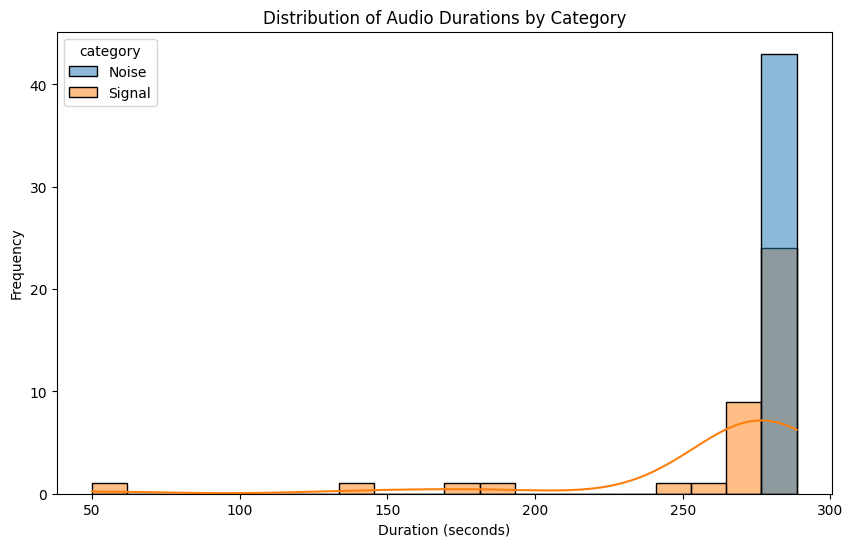

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=eda_df, x="duration", hue="category", bins=20, kde=True)
plt.title("Distribution of Audio Durations by Category")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


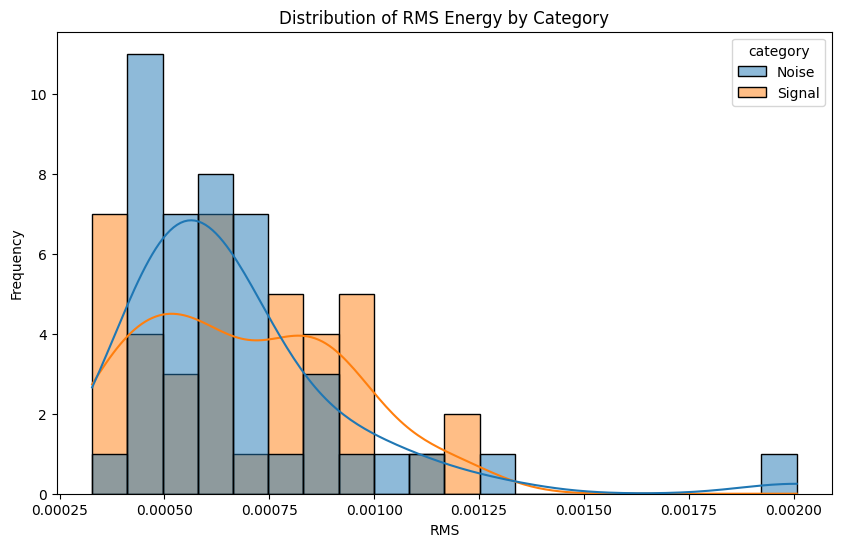

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=eda_df, x="rms", hue="category", bins=20, kde=True)
plt.title("Distribution of RMS Energy by Category")
plt.xlabel("RMS")
plt.ylabel("Frequency")
plt.show()


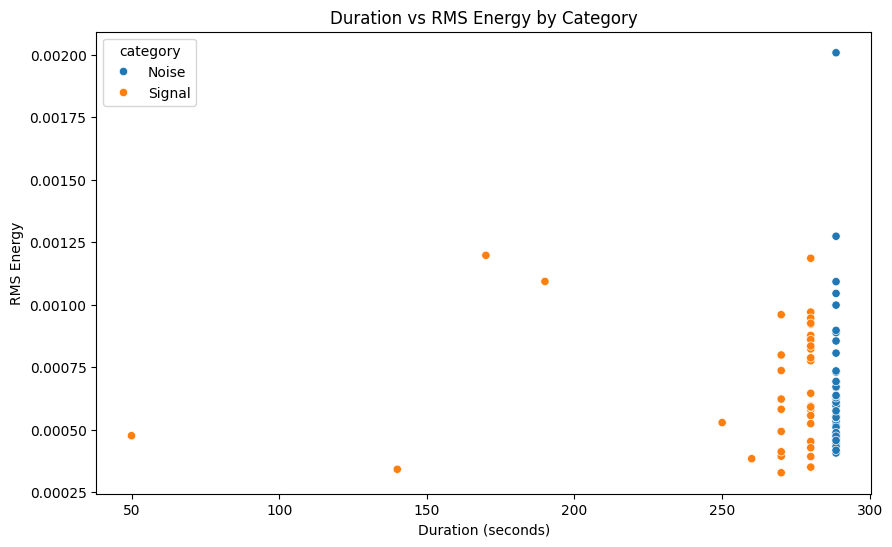

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_df, x='duration', y='rms', hue='category')
plt.title("Duration vs RMS Energy by Category")
plt.xlabel("Duration (seconds)")
plt.ylabel("RMS Energy")
plt.show()


In [11]:
# Load the .mat file
annotations = loadmat(ANNOTATIONS_FILE)

# Display keys in the .mat file to understand its structure
print("Keys in Annotations file:", annotations.keys())


Keys in Annotations file: dict_keys(['__header__', '__version__', '__globals__', 'Annotations_Dominica'])


In [35]:
annotation_data = annotations["Annotations_Dominica"]
annotation_data[1]

array([array(['SW_10_filtered.wav'], dtype='<U18'),
       array([[  0.2840816,   0.4397552,   0.7094576,   0.920696 ,   1.1445296,
                 1.4010992,   1.5919088,   2.0504432,   2.5213424,   3.0265328,
                 3.609848 ,   4.1642288,   4.6936112,   5.1890288,   6.1591472,
                 6.6354416,   7.1285936,   7.6363568,   8.1785072,   8.7768176,
                 9.3995312,   9.9982832,  10.4511344,  10.5623024,  10.9743344,
                11.078456 ,  11.455352 ,  11.5625264,  11.919032 ,  12.0359408,
                12.3841136,  12.516152 ,  12.84668  ,  13.005752 ,  13.309016 ,
                13.5052976,  13.5768368,  13.7741168,  14.0403248,  14.2449584,
                14.5966448,  14.7139568,  15.1058672,  15.1996016,  15.5922992,
                15.6869936,  16.0576112,  16.1812784,  16.528568 ,  16.6935152,
                17.0037488,  17.2054448,  17.4872432,  17.7150896,  17.9761136,
                18.2184944,  18.494456 ,  18.722456 ,  19.059128 ,  

In [41]:
annotation_data[2]

array([array(['SW_11_filtered.wav'], dtype='<U18'),
       array([[  1.5312368,   1.7903024,   2.1787376, ..., 266.9745392,
               267.3619376, 267.473048 ]])                             ],
      dtype=object)

In [50]:
click_data = [x[1].reshape(-1) for x in annotation_data[1:2]]

In [51]:
# Flatten the list of arrays into a single array of click times
all_click_times = np.concatenate(click_data)

# Sort the times (just in case they're not sorted)
all_click_times = np.sort(all_click_times)

# Compute total clicks and total time span
total_clicks = len(all_click_times)
total_time_span = all_click_times[-1] - all_click_times[0]  # In seconds

clicks_per_second = total_clicks / total_time_span / len(click_data)

print(f"Total Clicks: {total_clicks}")
print(f"Total Time Span: {total_time_span:.2f} seconds")
print(f"Clicks per Second: {clicks_per_second:.2f}")


Total Clicks: 725
Total Time Span: 279.18 seconds
Clicks per Second: 2.60


In [52]:
# Compute inter-click intervals (time differences between consecutive clicks)
inter_click_intervals = np.diff(all_click_times)

# Compute average, minimum, and maximum inter-click interval
avg_ici = np.mean(inter_click_intervals)
min_ici = np.min(inter_click_intervals)
max_ici = np.max(inter_click_intervals)

print(f"Average Inter-Click Interval: {avg_ici:.2f} seconds")
print(f"Minimum Inter-Click Interval: {min_ici:.2f} seconds")
print(f"Maximum Inter-Click Interval: {max_ici:.2f} seconds")

Average Inter-Click Interval: 0.39 seconds
Minimum Inter-Click Interval: 0.01 seconds
Maximum Inter-Click Interval: 13.21 seconds


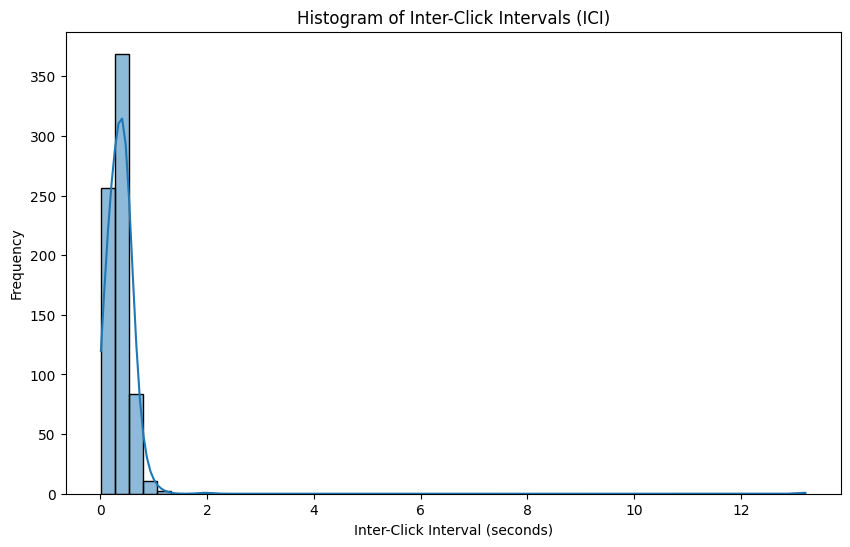

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(inter_click_intervals, bins=50, kde=True)
plt.title("Histogram of Inter-Click Intervals (ICI)")
plt.xlabel("Inter-Click Interval (seconds)")
plt.ylabel("Frequency")
plt.show()

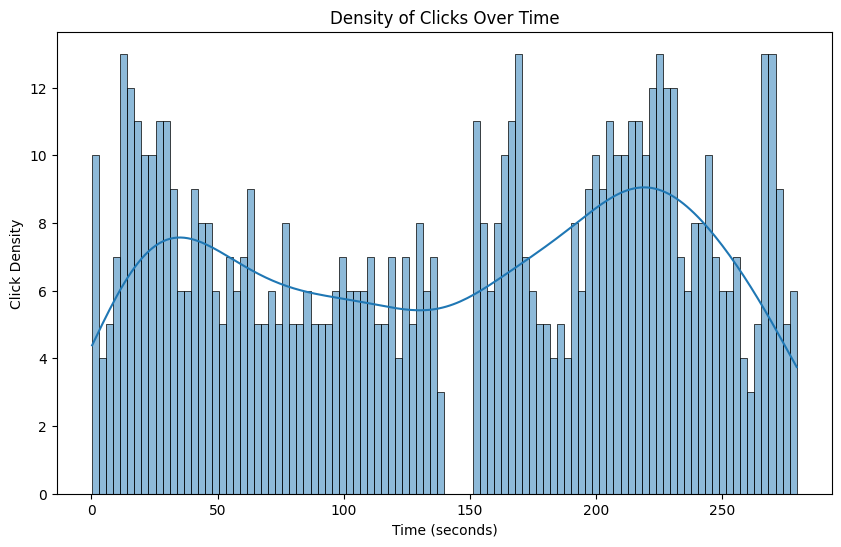

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(all_click_times, bins=100, kde=True)
plt.title("Density of Clicks Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Click Density")
plt.show()


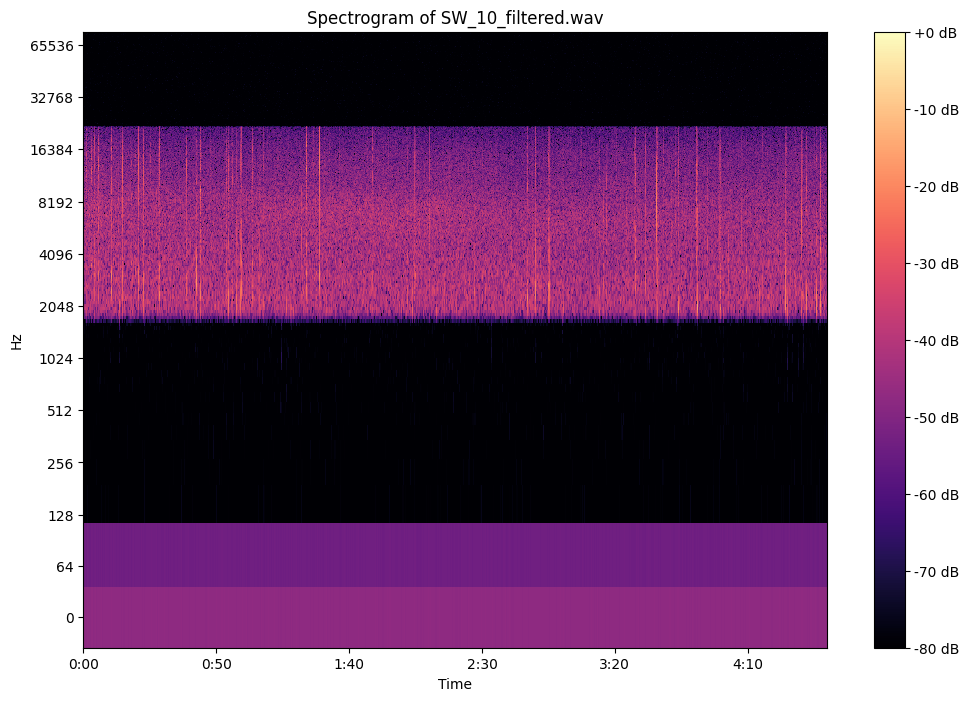

In [14]:
# Choose a sample file from the signal parts for spectrogram analysis
sample_file = os.path.join(DATASET_PATH_SIGNAL, eda_df[eda_df['category'] == 'Signal']['file_name'].iloc[0])
audio_data, sr = librosa.load(sample_file, sr=None)

plt.figure(figsize=(12, 8))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max),
                         sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram of {os.path.basename(sample_file)}")
plt.show()
